In [1]:
import cv2
import numpy as np
import shap
import matplotlib.pyplot as plt
import tensorflow as tf

2025-07-18 16:10:58.243337: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752855058.447610      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752855058.509905      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def classify_image(preprocessed_image, model):
    # Add batch dimension to the preprocessed image
    X_array = np.expand_dims(preprocessed_image, axis=0)

    # Get model predictions
    predictions = model(X_array)

    # Convert predictions to numpy array
    predictions_np = predictions.numpy()

    # Print the outputs of the final layer
    print("Outputs of the final layer:", predictions_np)

    # Optionally, return the predictions for further use
    return predictions_np

In [3]:
import tensorflow as tf

# Load the entire model
model = tf.keras.models.load_model('/kaggle/input/mobilenetmodelasl/tensorflow2/default/1/final_model_trained_on_all_MobileNet.h5')
path='/kaggle/input/outputsinhala/downloadfiv.png'

I0000 00:00:1752855069.529084      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752855069.529785      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:
import shap
import matplotlib.pyplot as plt
import cv2
import numpy as np

def runScript(path, model):
    img = cv2.imread(path)

    if img is not None:
        img_resized = cv2.resize(img, (224, 224))
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
        preprocessed_image = img_rgb.astype(np.float32) / 255.0
        X_array = np.expand_dims(preprocessed_image, axis=0)

        masker = shap.maskers.Image("blur(3,3)", X_array[0].shape)

        def model_predict(images):
            images = np.array(images)
            predictions = model(images)
            return predictions.numpy()

        class_names = ['eight', 'eleven_2', 'eleven_3', 'fifty_1', 'fifty_2', 'fifty_3', 'five', 'fourfourteen_2', 'fourteen_1', 'fourteen_3', 'nine', 'oneten_2eleven_1', 'seven', 'six', 'ten_1', 'ten_3', 'thirteen_1', 'thirteen_3', 'thirty_1', 'thirty_2', 'thirty_3', 'threethirteen_2', 'twenty_1','twenty_2','twenty_3', 'two','what','when_1','twenty_2','twenty_3','who','why']

        explainer = shap.Explainer(model_predict, masker, output_names=class_names)
        shap_values = explainer(X_array, max_evals=20000, batch_size=1)

        # Manually plot with large figure
        fig = plt.figure(figsize=(20, 20))  # Bigger canvas
        shap.image_plot(shap_values, show=False)
        plt.suptitle("SHAP Values for Image Classification", fontsize=10)
        plt.savefig("/kaggle/working/3originalshap_plot_outputfive.png", dpi=680, bbox_inches='tight')
        plt.show()

        prediction = classify_image(preprocessed_image, model)
        print("Model Prediction:", prediction)

        # Plot original image
        plt.figure(figsize=(6, 6))
        plt.imshow(img_rgb)
        plt.title(f"Original Image - Prediction: {prediction}")
        plt.axis('off')
        plt.show()
    else:
        print("Error: Image not found or could not be loaded.")


I0000 00:00:1752855075.699620      36 cuda_dnn.cc:529] Loaded cuDNN version 90300


  0%|          | 0/19998 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [12:22, 742.81s/it]              


<Figure size 2000x2000 with 0 Axes>

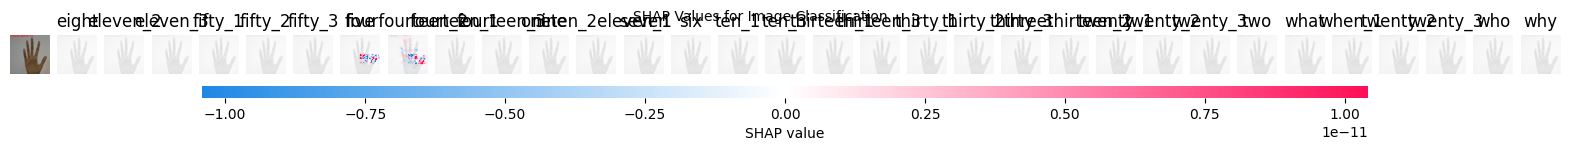

Outputs of the final layer: [[5.61805232e-18 3.24536791e-19 2.54150193e-21 1.96214621e-28
  1.16183342e-27 4.96097675e-26 1.00000000e+00 1.71064762e-09
  8.08832002e-20 1.57978030e-17 3.57400651e-19 2.40226289e-23
  2.02608081e-17 7.80867132e-19 6.20970166e-26 1.12974079e-19
  8.34545299e-20 1.64957353e-19 2.43433943e-22 6.49201325e-27
  2.29245290e-26 2.24157343e-16 2.50245689e-18 7.49037733e-21
  5.98696360e-24 1.14050215e-17 8.80186543e-25 1.05411262e-24
  3.46552818e-18 1.43834833e-10 1.72646375e-20 1.84854107e-27]]
Model Prediction: [[5.61805232e-18 3.24536791e-19 2.54150193e-21 1.96214621e-28
  1.16183342e-27 4.96097675e-26 1.00000000e+00 1.71064762e-09
  8.08832002e-20 1.57978030e-17 3.57400651e-19 2.40226289e-23
  2.02608081e-17 7.80867132e-19 6.20970166e-26 1.12974079e-19
  8.34545299e-20 1.64957353e-19 2.43433943e-22 6.49201325e-27
  2.29245290e-26 2.24157343e-16 2.50245689e-18 7.49037733e-21
  5.98696360e-24 1.14050215e-17 8.80186543e-25 1.05411262e-24
  3.46552818e-18 1.438

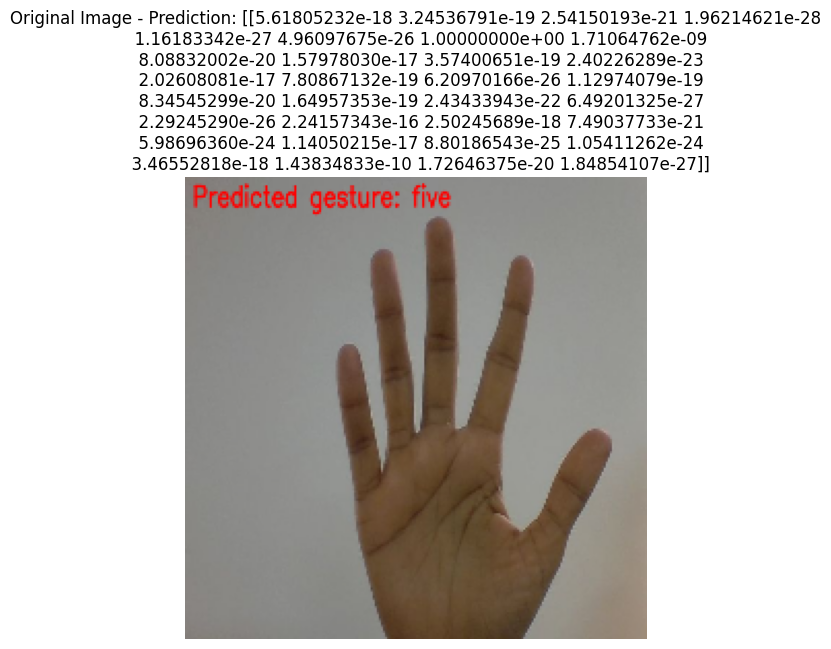

In [5]:
runScript(path, model)